# CS419 Course Project
---
by
| Group Members | Roll Number |
| --- | --- |
| Lyric Khare | 20D170022 |
| Pranav Limaye | 20D170028 |
| Shivam Ambotkar | 200100090 |
| Sneha Kulkarni | 20100145 |

## Importing Packages, and Features' .csv File

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [2]:
dataset = pd.read_csv('new_data.csv')
dataset

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,31,32,33,34,35,36,37,38,39,40
0,0,-130.796370,74.819300,-54.572865,52.122610,-44.373672,31.020088,-33.779335,15.443850,-16.115942,...,24.288164,17.539350,-2.643717,1.029061,-12.159833,-4.396376,4.190725,9.534203,-4.009512,1
1,1,-3.855116,2.000000,1.166478,2.000000,4.179504,1.000000,1.620850,1.000000,2.162497,...,0.000000,-4.444839,0.000000,-6.194203,0.000000,-8.336567,0.000000,-8.185556,0.000000,1
2,2,-4.302905,2.000000,1.593509,2.000000,6.417804,1.000000,3.321501,1.000000,2.472745,...,0.000000,-1.545830,0.000000,-2.890168,0.000000,-3.381741,0.000000,-1.803047,0.000000,1
3,3,-468.026370,19.817125,5.353889,-2.716784,-5.733524,-11.625327,-19.196585,-19.259008,-9.359211,...,-4.792150,-5.611277,-6.820725,-1.434351,7.871741,12.112943,8.132831,2.330214,0.982162,1
4,4,-7.322430,1.000000,1.281674,2.000000,-3.978334,1.000000,6.084324,1.000000,-3.049565,...,0.000000,9.592441,0.000000,-5.534307,0.000000,4.563056,0.000000,-1.250468,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,-3.027104,2.000000,6.180558,1.000000,-3.123523,1.000000,2.490655,1.000000,-2.154589,...,1.000000,-1.381869,0.000000,1.834822,1.000000,2.800428,1.000000,3.175736,1.000000,5
14996,14996,-253.952270,84.540090,-65.713806,21.658438,-29.159473,-16.468395,-25.006294,-7.932786,-20.890783,...,22.184465,11.244364,-2.587163,4.382207,2.270954,0.755722,4.165154,7.829354,0.356817,5
14997,14997,-250.724060,55.736835,-96.346030,47.179947,-43.777270,6.783529,-24.616007,-3.479070,1.848408,...,-2.047684,18.130400,13.900205,1.835833,-22.644096,-8.872356,10.145737,7.957575,-1.956827,5
14998,14998,-295.987100,55.638233,-57.036310,23.410994,-35.181090,-9.132803,-21.064272,-7.389163,-13.812897,...,-9.266277,-10.921691,-3.786743,-4.496049,-9.450455,2.345334,3.720546,-23.205126,-24.103697,5


In [3]:
dataset = dataset.drop(columns = 'Unnamed: 0')
dataset

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,-130.796370,74.819300,-54.572865,52.122610,-44.373672,31.020088,-33.779335,15.443850,-16.115942,3.669736,...,24.288164,17.539350,-2.643717,1.029061,-12.159833,-4.396376,4.190725,9.534203,-4.009512,1
1,-3.855116,2.000000,1.166478,2.000000,4.179504,1.000000,1.620850,1.000000,2.162497,1.000000,...,0.000000,-4.444839,0.000000,-6.194203,0.000000,-8.336567,0.000000,-8.185556,0.000000,1
2,-4.302905,2.000000,1.593509,2.000000,6.417804,1.000000,3.321501,1.000000,2.472745,1.000000,...,0.000000,-1.545830,0.000000,-2.890168,0.000000,-3.381741,0.000000,-1.803047,0.000000,1
3,-468.026370,19.817125,5.353889,-2.716784,-5.733524,-11.625327,-19.196585,-19.259008,-9.359211,1.473070,...,-4.792150,-5.611277,-6.820725,-1.434351,7.871741,12.112943,8.132831,2.330214,0.982162,1
4,-7.322430,1.000000,1.281674,2.000000,-3.978334,1.000000,6.084324,1.000000,-3.049565,1.000000,...,0.000000,9.592441,0.000000,-5.534307,0.000000,4.563056,0.000000,-1.250468,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,-3.027104,2.000000,6.180558,1.000000,-3.123523,1.000000,2.490655,1.000000,-2.154589,1.000000,...,1.000000,-1.381869,0.000000,1.834822,1.000000,2.800428,1.000000,3.175736,1.000000,5
14996,-253.952270,84.540090,-65.713806,21.658438,-29.159473,-16.468395,-25.006294,-7.932786,-20.890783,-16.055900,...,22.184465,11.244364,-2.587163,4.382207,2.270954,0.755722,4.165154,7.829354,0.356817,5
14997,-250.724060,55.736835,-96.346030,47.179947,-43.777270,6.783529,-24.616007,-3.479070,1.848408,-11.140788,...,-2.047684,18.130400,13.900205,1.835833,-22.644096,-8.872356,10.145737,7.957575,-1.956827,5
14998,-295.987100,55.638233,-57.036310,23.410994,-35.181090,-9.132803,-21.064272,-7.389163,-13.812897,-16.650848,...,-9.266277,-10.921691,-3.786743,-4.496049,-9.450455,2.345334,3.720546,-23.205126,-24.103697,5


In [4]:
X = dataset.iloc[:, 0:40]
Y = dataset.iloc[:, 40]
Y

0        1
1        1
2        1
3        1
4        1
        ..
14995    5
14996    5
14997    5
14998    5
14999    5
Name: 40, Length: 15000, dtype: int64

## Data Pre-Processing

In [5]:
# Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)                                                                          # for all models
# Categorical Label Encoding
labelencoder = LabelEncoder()
y=to_categorical(labelencoder.fit_transform(Y))                                                             # for the neural network

In [6]:
#Splitting
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.33, random_state = 20)       # for all other models
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_scaled, y, test_size = 0.33, random_state = 20)   # for the neural network

## Employing Algorithms

### Neural Network

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

In [8]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.3))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
#model.add(Dropout(0.3))

###final layer
model.add(Dense(5))
model.add(Activation('softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [10]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 250
num_batch_size = 10

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

history = model.fit(X_train1, Y_train1, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test1, Y_test1), verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/250
1005/1005 [==============================] - 3s 2ms/step - loss: 1.5829 - accuracy: 0.2516 - val_loss: 1.5223 - val_accuracy: 0.3232
Epoch 2/250
1005/1005 [==============================] - 2s 2ms/step - loss: 1.5041 - accuracy: 0.3009 - val_loss: 1.4761 - val_accuracy: 0.3234
Epoch 3/250
1005/1005 [==============================] - 2s 2ms/step - loss: 1.4804 - accuracy: 0.3131 - val_loss: 1.4411 - val_accuracy: 0.3343
Epoch 4/250
1005/1005 [==============================] - 2s 2ms/step - loss: 1.4622 - accuracy: 0.3219 - val_loss: 1.4369 - val_accuracy: 0.3271
Epoch 5/250
1005/1005 [==============================] - 2s 2ms/step - loss: 1.4594 - accuracy: 0.3305 - val_loss: 1.4349 - val_accuracy: 0.3299
Epoch 6/250
1005/1005 [==============================] - 2s 2ms/step - loss: 1.4494 - accuracy: 0.3299 - val_loss: 1.4262 - val_accuracy: 0.3370
Epoch 7/250
1005/1005 [==============================] - 2s 2ms/step - loss: 1.4385 - accuracy: 0.3355 - val_loss: 1.4083 - val_ac

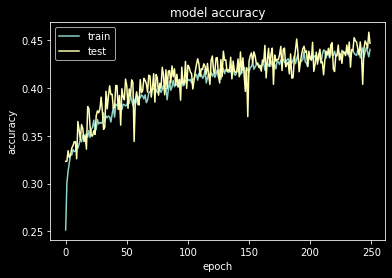

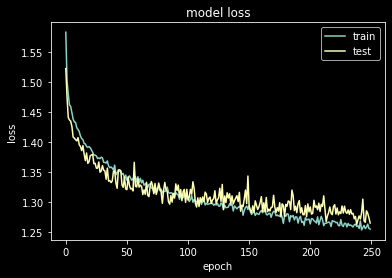

In [12]:
#Accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
#Loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

### Logistic Regression Classifier

In [13]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter = 100000)
logreg.fit(X_train, Y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, Y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, Y_test)))

Accuracy of Logistic regression classifier on training set: 0.39
Accuracy of Logistic regression classifier on test set: 0.38


### Linear Discriminant Analysis

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, Y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, Y_test)))

Accuracy of LDA classifier on training set: 0.38
Accuracy of LDA classifier on test set: 0.37


### Decision Tree Classifier

In [15]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 50).fit(X_train, Y_train)
y_predictions = model.predict(X_test)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(model.score(X_train, Y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(model.score(X_test, Y_test)))
 
# Creating a confusion matrix
cm = confusion_matrix(Y_test, y_predictions)

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.56


For max_depth = 20
Accuracy: 0.5648484848484848


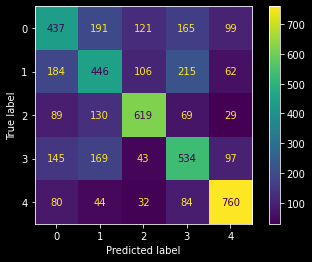

For max_depth = 60
Accuracy: 0.5608080808080808


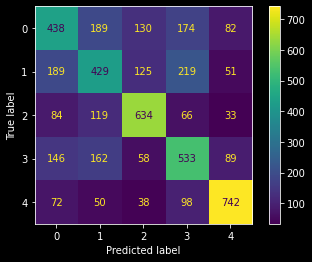

For max_depth = 100
Accuracy: 0.5626262626262626


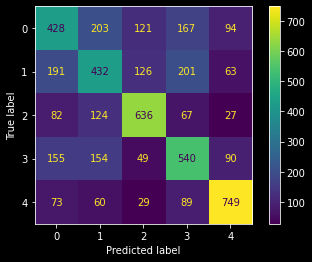

For max_depth = 140
Accuracy: 0.5591919191919192


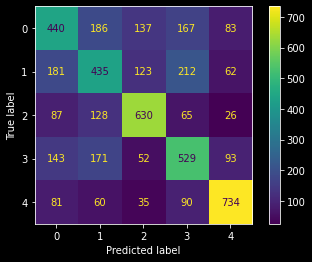

For max_depth = 180
Accuracy: 0.554949494949495


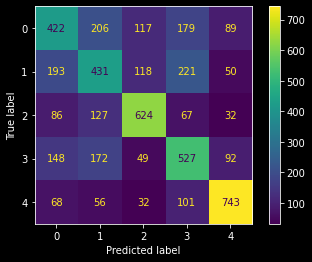

For max_depth = 220
Accuracy: 0.564040404040404


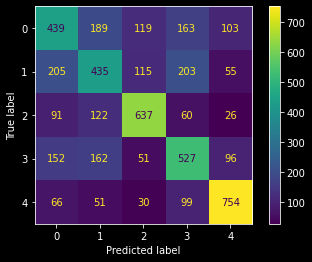

For max_depth = 260
Accuracy: 0.5628282828282828


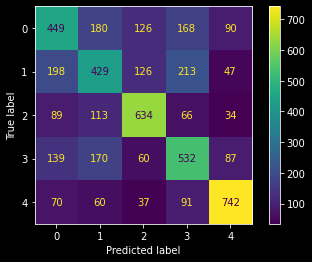

For max_depth = 300
Accuracy: 0.5638383838383838


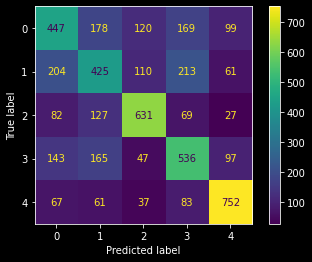

In [16]:
max_depths = [20, 60, 100, 140, 180, 220, 260, 300]
for i in max_depths:
  print('For max_depth = ' + str(i))
  model = DecisionTreeClassifier(max_depth = i).fit(X_train, Y_train)
  y_predictions = model.predict(X_test)
  print("Accuracy:",accuracy_score(Y_test, y_predictions))
  # Creating a confusion matrix
  cm = confusion_matrix(Y_test, y_predictions)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()
  plt.show()

### K-Nearest Neighbours Classifier

Accuracy of K-NN classifier on training set: 0.67
Accuracy of K-NN classifier on test set: 0.50


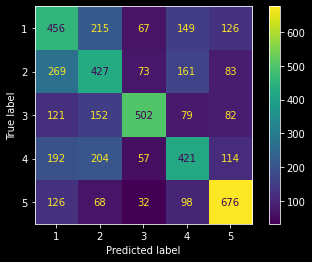

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train.values.ravel())
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, Y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, Y_test)))

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Y_test,knn.predict(X_test))
plt.show()

### Random Forests Classifier

Out-of-bag Score:  0.6899502487562189
Accuracy of Random Forests Classifier on training set: 1.00
Accuracy of Random Forests Classifier on test set: 0.71


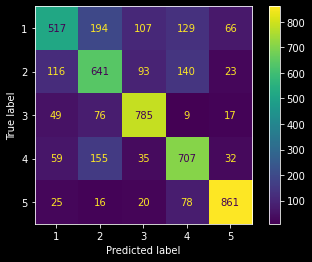

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100, oob_score=True)
rfc.fit(X_train, Y_train.values.ravel())
Y_pred = rfc.predict(X_test)
print('Out-of-bag Score: ',rfc.oob_score_)
print('Accuracy of Random Forests Classifier on training set: {:.2f}'
     .format(rfc.score(X_train, Y_train)))
print('Accuracy of Random Forests Classifier on test set: {:.2f}'
     .format(rfc.score(X_test, Y_test)))
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Y_test,rfc.predict(X_test))
plt.show()

## Performance Comparison (Ranked)

| # | Algorithm | Training Accuracy | Testing Accuracy |
| --- | --- | --- | --- |
| 1. | Random Forest Classifier | 1.00 | 0.72 |
| 2. | Decision Tree Classifier | 1.00 | 0.56 |
| 3. | K-Nearest Neighbours Classifier | 0.68 | 0.52 |
| 4. | Neural Network | 0.44 | 0.47 |
| 5. | Logistic Regression Classifier | 0.39 | 0.38 |
| 6. | Linear Discriminant Analysis | 0.38 | 0.37 |